

# ![cdc logo](img/logo_cdc.png) Centers for Disease Control and Prevention, COVID-19 Response.  

Datasets used  
[Data Set vbim-akqf](https://data.cdc.gov/resource/vbim-akqf) COVID-19 Case Surveillance Data  
[Data Set 9mfq-cb36](https://data.cdc.gov/resource/9mfq-cb36) US COVID-19 Cases and Deaths by State over Time   

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import seaborn as sns
from sodapy import Socrata                                # https://github.com/xmunoz/sodapy/blob/master/examples/basic_queries.ipynb
socrata_domain = 'data.cdc.gov'                           # obtain app token at https://opendata.socrata.com/signup
f = open(".sodapy", "r")                                  # store token in this file (first line - no <CR>)
socrata_apptoken = f.read()
client = Socrata(socrata_domain, socrata_apptoken)
# pd.options.display.float_format = '{:,.0f}'.format      # print all floats as commas and drop decemals

latest date  12/02/2020
total cases  13,822,249
total deaths 272,525


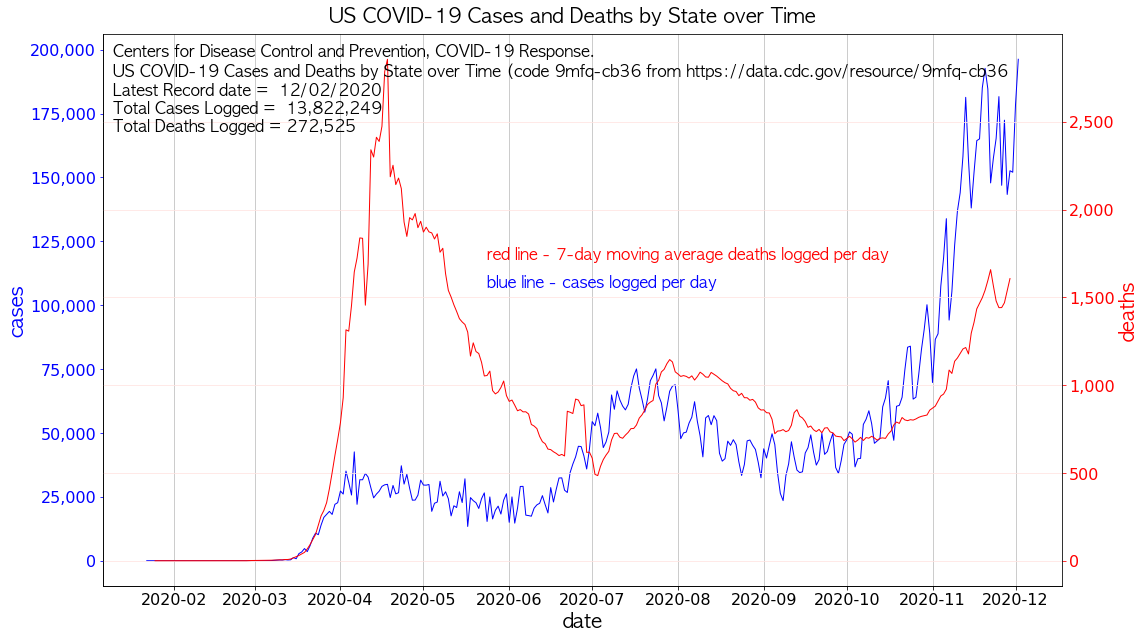

In [16]:
# GET DATA W/ SODAPY PULL & PROCESS DATAFRAME

results_st = client.get_all('9mfq-cb36')
results_st = pd.DataFrame.from_records(results_st)
results_st = results_st.drop(columns=['pnew_death','prob_death','pnew_case','prob_cases','consent_deaths', 'consent_cases', 'created_at', 'state', 'tot_death', 'tot_cases', 'conf_cases', 'conf_death'])                         # remove unused columns
results_st['submission_date'] = pd.to_datetime(results_st['submission_date'])           # convert to datetime format
results_st = results_st.set_index('submission_date')                                    # index dataframe
results_st = results_st[results_st.index != results_st.index.max()]                     # remove latest date - deaths wrong in NYC
results_st['new_case'] = results_st.new_case.astype(float)                              # convert key fields to floats
results_st['new_death'] = results_st.new_death.astype(float)
results_st_new_case = results_st.groupby('submission_date').agg(['sum']).reset_index()  # tabulate total state reported cases per day
results_st_new_death = results_st.groupby('submission_date').agg(['sum']).reset_index() # deaths per day
total_cases = results_st_new_case['new_case'].sum()
cases = ('{:,}'.format(int(total_cases)))
total_deaths = results_st_new_case['new_death'].sum()
deaths = ('{:,}'.format(int(total_deaths)))
print("latest date ", results_st.index.max().strftime("%m/%d/%Y"))
print("total cases ", cases)
print("total deaths", deaths)
results_st_new_death['deaths_7day_ave'] = results_st_new_death.new_death.rolling(7).mean().shift(-3) # make 7-day avg deaths column

# PLOT
 
legend = 'Centers for Disease Control and Prevention, COVID-19 Response. \nUS COVID-19 Cases and Deaths by State over Time (code 9mfq-cb36 from https://data.cdc.gov/resource/9mfq-cb36 \nLatest Record date =  ' + results_st.index.max().strftime("%m/%d/%Y") + '\nTotal Cases Logged =  ' + cases + '\nTotal Deaths Logged = ' + deaths

cases_day = 'blue line - cases logged per day'
deaths_day = 'red line - 7-day moving average deaths logged per day'

fig, ax = plt.subplots(figsize=(16,9))
fig.suptitle('US COVID-19 Cases and Deaths by State over Time', fontname = 'AppleGothic', size=20)
fig.text(0.01, 0.9, legend, ha = 'left', va = 'center', transform = ax.transAxes, fontname = 'AppleGothic',size = 16)
ax.set_alpha(0.0)
sns.despine(top = True, right = True, left = False, bottom = False)
ax.plot(results_st_new_case.submission_date, results_st_new_case.new_case, color = 'blue', linewidth = 1)

ax.grid(b=None, which='both', axis='x', color = 'silver')

ax.set_xlabel('date', color = 'black', fontname = 'AppleGothic', size = 20)
ax.tick_params(labelsize = 16, color = 'black', axis = 'x', colors = 'black')

ax.set_ylabel('cases', color = 'blue', fontname = 'AppleGothic', size = 20)
ax.tick_params(labelsize = 16, color = 'blue', axis = 'y', colors = 'blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2=ax.twinx()
ax2.set_ylabel('deaths', color = 'red', fontname = 'AppleGothic', size = 20)
ax2.yaxis.set_ticks(np.arange(0, 12000, 500))

ax2.grid(b=None, which='major', axis='both', color = 'mistyrose')

ax2.tick_params(labelsize = 16, axis = 'y', colors = 'red')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2.plot(results_st_new_death.submission_date, results_st_new_death.deaths_7day_ave, color = 'red', linewidth = 1)

fig.text(0.40, 0.60, deaths_day, ha = 'left', va = 'center', transform = ax.transAxes, color = 'red', fontname = 'AppleGothic', size = 16)
fig.text(0.40, 0.55, cases_day, ha = 'left', va = 'center', transform = ax.transAxes, color = 'blue', fontname = 'AppleGothic', size = 16)

plt.tight_layout()
plt.show()

# filedate = results_st.index.max().strftime("%m-%d-%Y")
ax.figure.savefig('img/cdc_us_covid-19_cases_and_deaths_by_state_over_time_' + results_st.index.max().strftime("%Y%m%d") + '.svg', dpi=150, transparent=True)
ax.figure.savefig('img/cdc_us_covid-19_cases_and_deaths_by_state_over_time_' + results_st.index.max().strftime("%Y%m%d") + '.png', dpi=150, transparent=True)

Updated CDC data illustrating COVID-19 cases and deaths by day. Sadly, the down-trend in fatalities from the fall is now starting to rise, popping back above 1000 per day not seen since early August and downtrend going for most of the fall. The inoculations and treatments can't come soon enough to put the trend back on track to eradication. 

Stay safe this holiday season, everyone.
 

current_status    int64
hosp_yn           int64
icu_yn            int64
death_yn          int64
dtype: object
               current_status  hosp_yn  icu_yn  death_yn
cdc_report_dt                                           
2020-11-10                  1        0       0         0
2020-11-14                  1        0       0         0
total cases    8,405,079
total deaths   183,577
latest date    11/19/2020
earliest date  01/01/2020
cdc_report_dt         datetime64[ns]
death_yn       sum             int64
dtype: object
  cdc_report_dt death_yn
                     sum
0    2020-01-01        0
1    2020-01-02        0
cdc_report_dt          datetime64[ns]
current_status  sum             int64
dtype: object
  cdc_report_dt current_status
                           sum
0    2020-01-01             12
1    2020-01-02              3


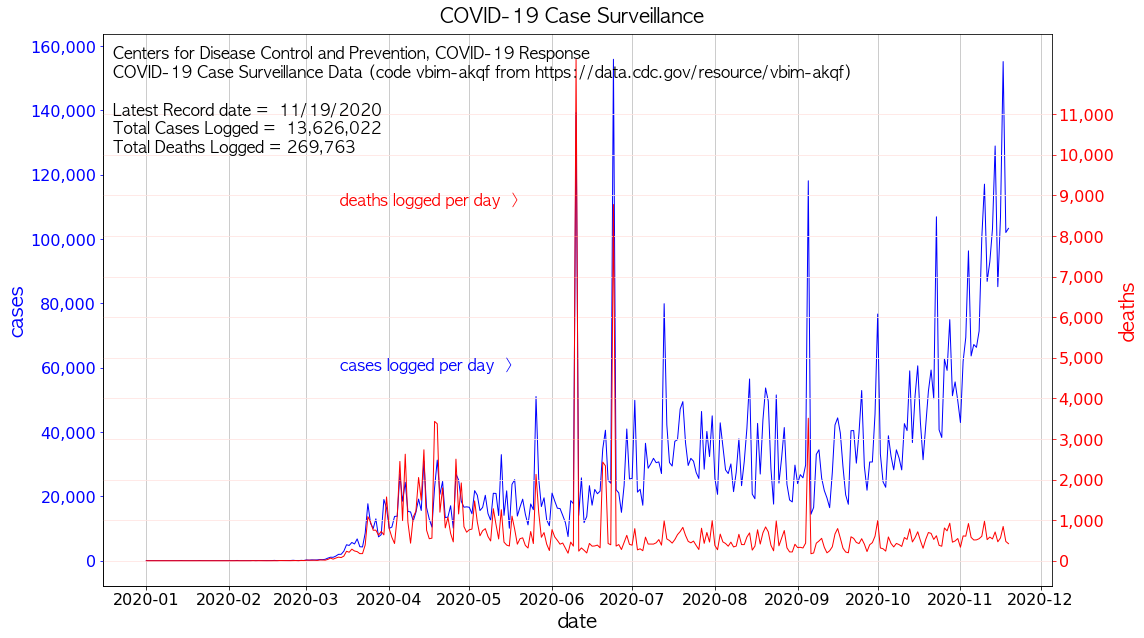

In [13]:

# GET DATA SODAPY PULL

# results = client.get_all('vbim-akqf')
# df = pd.DataFrame.from_records(results)    # downloads ~ 12M records - takes a while - faster to download csv and process

# GET DATA FROM DOWNLOADED CSV https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf
# df = pd.read_csv('/Users/bsmith/Dropbox/arch/COVID-19_Case_Surveillance_Public_Use_Data.csv')
df = pd.read_csv('/Users/bsmith/Desktop/COVID-19_Case_Surveillance_Public_Use_Data.csv')

df = df.drop(columns=['pos_spec_dt','onset_dt','medcond_yn','age_group','sex','Race and ethnicity (combined)']) 
df = df.replace({'death_yn' : { 'No' : 0, 'Unknown' : 0, 'Missing' : 0, 'Yes' : 1 }})
df = df.replace({'icu_yn' : { 'No' : 0, 'Unknown' : 0, 'Missing' : 0, 'Yes' : 1 }})
df = df.replace({'hosp_yn' : { 'No' : 0, 'Unknown' : 0, 'Missing' : 0, 'Yes' : 1 }})
df = df.replace({'current_status' : {'Laboratory-confirmed case' : 1, 'Probable Case' : 1 }})
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'])
df = df.set_index('cdc_report_dt')

sumdeaths_df = df.groupby('cdc_report_dt').agg(['sum']).reset_index()
sumdeaths_df = sumdeaths_df.drop(columns=['current_status', 'hosp_yn', 'icu_yn'])
sumcases_df  = df.groupby('cdc_report_dt').agg(['sum']).reset_index()
sumcases_df  = sumcases_df.drop(columns=['hosp_yn', 'icu_yn', 'death_yn'])

pd.options.display.float_format = '{:,.0f}'.format      # print all floats as commas and drop decemals

print(df.dtypes)
print(df.head(2))
print("total cases   ", '{0:,}'.format(df.shape[0]))
print("total deaths  ", '{0:,}'.format(df['death_yn'].sum()))
print("latest date   ", df.index.max().strftime("%m/%d/%Y"))
print("earliest date ", df.index.min().strftime("%m/%d/%Y"))

print(sumdeaths_df.dtypes)
print(sumdeaths_df.head(2))
print(sumcases_df.dtypes)
print(sumcases_df.head(2))

# VISUALIZATION
 
legend = 'Centers for Disease Control and Prevention, COVID-19 Response\nCOVID-19 Case Surveillance Data (code vbim-akqf from https://data.cdc.gov/resource/vbim-akqf)\n\nLatest Record date =  ' + df.index.max().strftime("%m/%d/%Y") + '\nTotal Cases Logged =  ' + cases + '\nTotal Deaths Logged = '+ deaths

sur_cases_day  = 'blue line - cases logged per day'
sur_deaths_day = 'rad line - deaths logged per day'

fig, ax = plt.subplots(figsize=(16,9))
fig.suptitle('COVID-19 Case Surveillance', fontname = 'AppleGothic', size=20)
fig.text(0.01, 0.88, legend, ha = 'left', va = 'center', transform = ax.transAxes, fontname = 'AppleGothic',size = 16)
ax.set_alpha(0.0)
sns.despine(top = True, right = True, left = False, bottom = False)
ax.plot(sumcases_df.cdc_report_dt, sumcases_df.current_status, color = 'blue', linewidth = 1)

ax.grid(b=None, which='both', axis='x', color = 'silver')

ax.set_xlabel('date', color = 'black', fontname = 'AppleGothic', size = 20)
ax.tick_params(labelsize = 16, color = 'black', axis = 'x', colors = 'black')

ax.set_ylabel('cases', color = 'blue', fontname = 'AppleGothic', size = 20)
ax.tick_params(labelsize = 16, color = 'blue', axis = 'y', colors = 'blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2=ax.twinx()
ax2.set_ylabel('deaths', color = 'red', fontname = 'AppleGothic', size = 20)
ax2.yaxis.set_ticks(np.arange(0, 12000, 1000))
ax2.tick_params(labelsize = 16, axis = 'y', colors = 'red')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2.grid(b=None, which='major', axis='both', color = 'mistyrose')

ax2.plot(sumdeaths_df.cdc_report_dt, sumdeaths_df.death_yn, color = 'red', linewidth = 1)

fig.text(0.25, 0.5, sur_deaths_day, ha = 'left', va = 'center', transform = ax.transAxes, color = 'red', fontname = 'AppleGothic', size = 16)
fig.text(0.25, 0.4, sur_cases_day, ha = 'left', va = 'center', transform = ax.transAxes, color = 'blue', fontname = 'AppleGothic', size = 16)

plt.tight_layout()
plt.show()

ax.figure.savefig('img/cdc_covid-19_case_surveillance_' + df.index.max().strftime("%Y%m%d") + '.svg', dpi=96, transparent=True)
ax.figure.savefig('img/cdc_covid-19_case_surveillance_' + df.index.max().strftime("%Y%m%d") + '.png', dpi=96, transparent=True)